

# 项目：调查未前往就诊的挂号预约的数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

本数据集包含10万条巴西预约挂号的求诊信息，研究病人是否如约前往医院就诊。每行数据录入了有关患者特点的多个数值，包括 “预约日期 (ScheduledDay)”指患者具体预约就诊的日期；“街区 (Neighborhood) ”指医院所在位置；“福利保障 (Scholarship)”说明病人是否是巴西福利项目 Bolsa Família 的保障人群；请注意最后一列内容的编码：“No”表示病人已如约就诊，“Yes”说明病人未前往就诊。

通过接下来的数据分析，我们来看一看性别、等待就诊的时间及是否有补助金会不会影响病人最终是否去就诊。

In [2]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', parse_dates=[3,4])

# 务必包含一个‘magic word’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## 数据整理



### 常规属性

In [3]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


加载数据集，并且打印数据集前几行，检查数据

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


检查数据基本信息

In [23]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

检查数据集是否存在重复数据

In [24]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


获取数据集基本统计学描述信息，以便后续分析。



### 数据清洗及处理

更改数据格式，将预约时间改成时间格式

In [7]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

在之前的统计学描述上看到，最小的年龄是-1，这是不符合常识的，所以要清洗掉这些错误数据

In [8]:
df[df['Age']< 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
df = df.drop(99832)

因为数据集的描述为“Handcap = True or False”，所以Handcap不应该存在大于1的数值，所以清洗这部分错误数据

In [10]:
df[df['Handcap']> 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14 09:26:08,2016-04-29,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29 10:08:48,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29 08:13:59,2016-04-29,11,ANDORINHAS,0,0,0,0,2,0,No
2213,3.423831e+09,5640766,F,2016-04-29 11:22:50,2016-04-29,29,VILA RUBIM,0,0,0,0,2,0,No
2214,2.754718e+12,5640760,M,2016-04-29 11:22:20,2016-04-29,55,DO QUADRO,0,0,0,0,3,0,No
2673,4.415275e+13,5589893,M,2016-04-15 13:06:05,2016-04-29,17,SANTA TEREZA,0,0,0,0,2,1,No
5424,1.647280e+12,5647342,M,2016-05-02 13:24:36,2016-05-04,65,SANTO ANDRÉ,0,1,1,1,2,0,Yes
5467,4.555225e+12,5689883,F,2016-05-12 09:10:28,2016-05-16,10,BENTO FERREIRA,0,0,0,0,2,0,No


In [11]:
df = df.drop(df[df['Handcap']> 1].index)

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 问题一：预约医生的用户是否去就诊在性别间是否有差异

In [19]:
df.groupby(['No-show']).mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No-show,,,,,,,,,
No,1.477015e+14,5.681124e+06,37.777090,0.093880,0.204068,0.073573,0.030404,0.019035,0.291429
Yes,1.468248e+14,5.652270e+06,34.279109,0.115675,0.168238,0.063830,0.030299,0.016429,0.438774


In [32]:
data = df.groupby(['Gender', 'No-show']).count()['PatientId']
print(data)

Gender  No-show
F       No         57162
        Yes        14568
M       No         30887
        Yes         7710
Name: PatientId, dtype: int64


In [44]:
fp = data[1]/(data[0] + data[1]) 
mp = data[3]/(data[2] + data[3])

print('女性未就诊的百分比：{:.2%}'.format(fp))
print('男性未就诊的百分比：{:.2%}'.format(mp))

女性未就诊的百分比：20.31%
男性未就诊的百分比：19.98%


Text(0.5,1,'The number of visiting doctor')

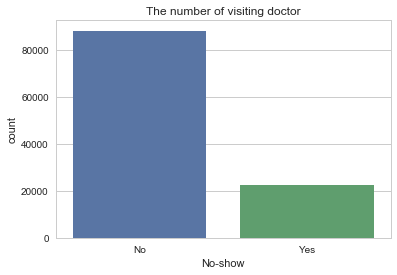

In [55]:
#no_show_count = df.groupby(['No-show']).count()['PatientId']
#no_show_count.plot(kind='bar')
sns.set(style="whitegrid")
sns.countplot(x='No-show', data=df)
plt.title('The number of visiting doctor')

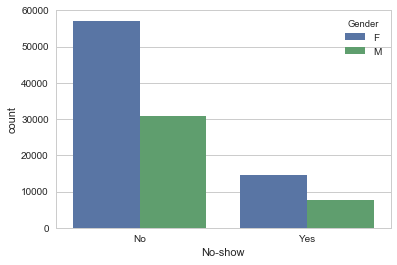

In [38]:
sns.set(style="whitegrid")
sns.countplot(x='No-show', hue='Gender', data=df)
plt.title('The different gender of visiting doctor')

女性在预约就诊的数量远远超过男性，没有就诊的人所占的比例是差不多的。

### 问题二：等待就诊的时间是否会影响没有就诊病人的百分率

$ 没有就诊的病人的百分比 = \frac{没有就诊的病人}{总人数} * 100 \% $

等待1天，没有就诊的病人所占的百分比为29.08%
等待7天，没有就诊的病人所占的百分比为32.05%
等待30天，没有就诊的病人所占的百分比为32.97%
等待100天，没有就诊的病人所占的百分比为29.71%


Text(0,0.5,'Percent ')

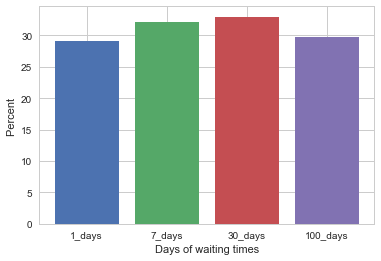

In [51]:
days = [1, 7, 30, 100]
for i in days:
    pt = df['AppointmentDay']-df['ScheduledDay'] > pd.Timedelta('{} days'.format(i))
    data = df[pt].groupby(['No-show']).count()['PatientId']
    nsp = data[1]/(data[0]+data[1]) * 100
    index = '{}_days'.format(i)
    #print(‘等待{}天，没有就诊的病人所占的百分比为：{:.2f}'.format(i,nsp))
    print('等待{}天，没有就诊的病人所占的百分比为{:.2f}%'.format(i, nsp))
    plt.bar(index, nsp)
    
plt.xlabel("Days of waiting times")
plt.ylabel("Percent ")


### 问题三：有无奖金是否会影响病人去就诊的情况

Text(0.5,1,'scholarship numbers ')

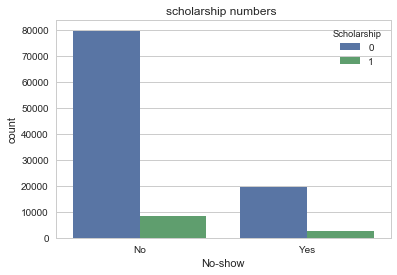

In [58]:
sns.set(style="whitegrid")
sns.countplot(x='No-show', hue='Scholarship', data=df)
plt.title('scholarship numbers ')

In [62]:
data = df.groupby(['Scholarship','No-show']).count()['PatientId']
print(data)

Scholarship  No-show
0            No         79783
             Yes        19701
1            No          8266
             Yes         2577
Name: PatientId, dtype: int64


In [75]:
have_scholarship = data[3]/(data[2] + data[3]) 
no_scholarship = data[0][1]/(data[0][0] + data[0][1])
print('有补助金的人未就诊的百分比：{:.2%}'.format(have_scholarship))
print('没有补助金的人未就诊的百分比：{:.2%}'.format(no_scholarship))


有补助金的人未就诊的百分比：23.77%
没有补助金的人未就诊的百分比：19.80%


<a id='conclusions'></a>
## 结论

1. 问题一：预约就诊的女性的数量远远多于男性，但是在女性和男性预约后未去就诊的人数所占的百分比都差不多。
2. 问题二：分别计算了需要等待1天、7天、30天、100天，未去就诊的人数所占的百分比，这些分组的百分比并没有明显差距
3. 问题三：没有补助金的人未就诊的百分比要比有补助金的未就诊的百分比低



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])